In [31]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 2.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration


In [8]:
data = pd.read_csv("data/PJME_hourly 2.csv", index_col=[0], parse_dates=[0])

In [9]:
data

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


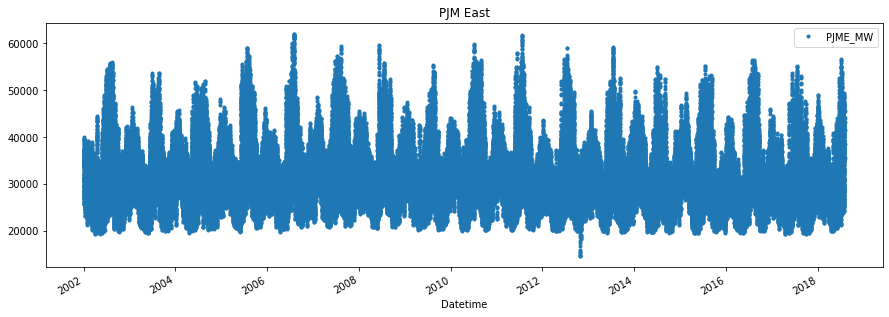

In [14]:
data.plot(style='.', figsize=(15,5), title='PJM East')
plt.show()

Now, we will break the data into years, month, days, hours to study how the data varies

In [28]:
def create_features(data) :
    df = data.copy()
    df['date'] = df.index
    df['year'] = df['date'].dt.year
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df.drop('date', axis = 1, inplace = True)
    return df
X = create_features(data)

In [29]:
X

,PJME_MW,year,hour,dayofweek,weekofyear
Datetime,,,,,
2002-12-31 01:00:00,26498.0,2002,1,1,1
2002-12-31 02:00:00,25147.0,2002,2,1,1
2002-12-31 03:00:00,24574.0,2002,3,1,1
2002-12-31 04:00:00,24393.0,2002,4,1,1
2002-12-31 05:00:00,24860.0,2002,5,1,1
...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,2018,20,0,1
2018-01-01 21:00:00,43751.0,2018,21,0,1
2018-01-01 22:00:00,42402.0,2018,22,0,1


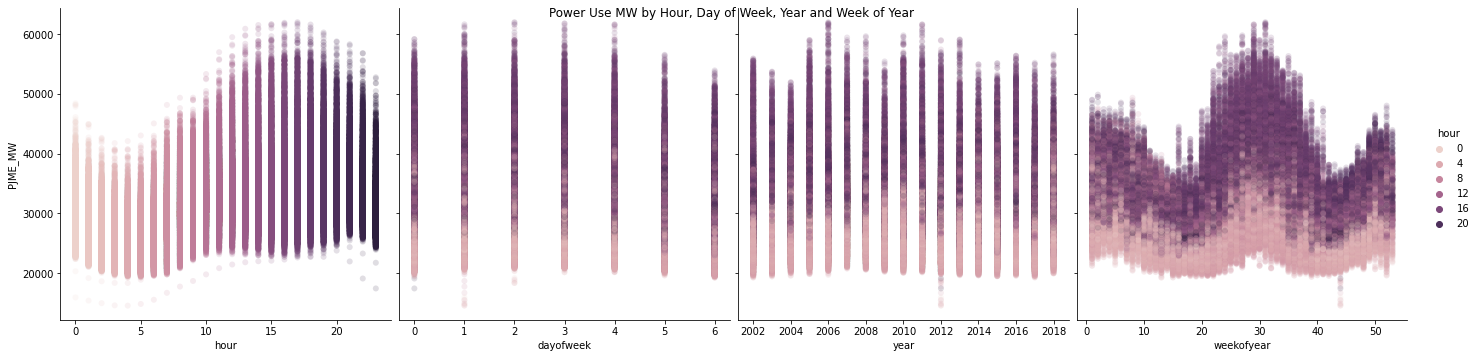

In [33]:
sns.pairplot(X.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='PJME_MW',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')
plt.show()